The first 10 values of raw audio data :
[ 3.6621094e-04  2.4414062e-04  1.5258789e-04  2.7465820e-04
  1.5258789e-04  3.0517578e-05  6.1035156e-05  1.5258789e-04
  3.0517578e-05 -6.1035156e-05]
The Dimensions of the Audio : 
(174993,)
Sample Rate : 44100
Dimensions of spectrogram:
(128, 342)
<class 'numpy.ndarray'>


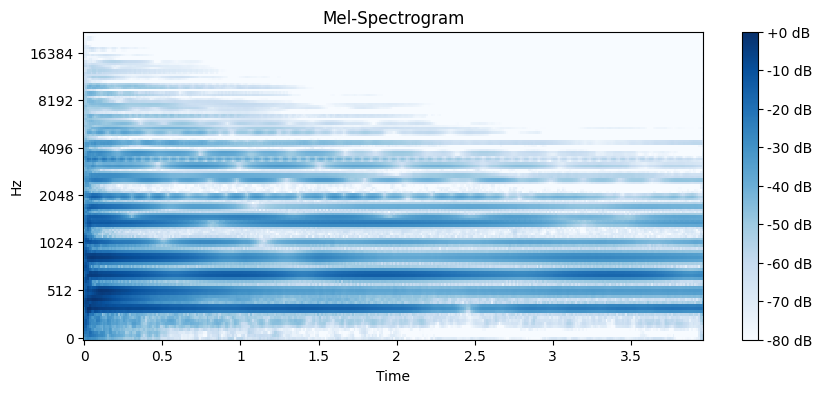

In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa

audio_file_path = './data/major/C_Major_v10_0.wav'

raw_data, sample_rate = librosa.load(audio_file_path, sr=None) 

print("The first 10 values of raw audio data :")
print(raw_data[:10])

print("The Dimensions of the Audio : ")
print(raw_data.shape)

print("Sample Rate : " + str(sample_rate))

# convert the data into spectrogram and then convert to decibels dB
spectrogram = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=128, fmax=8000)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

print("Dimensions of spectrogram:")
print(spectrogram_db.shape)
print(type(spectrogram_db))

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate, cmap="Blues")
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()



In [2]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_dataset

train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_dataset('./data')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.fit_transform(val_labels)
test_labels = label_encoder.fit_transform(test_labels)


In [3]:
print("Values of Training Data:")
print(train_data[0])

print("Shape of Datasets:")
print(f"Train:", train_data.shape)
print(f"Validation:", val_data.shape)
print(f"Test:", test_data.shape)

Values of Training Data:
[[0.49720326 0.51459056 0.5248434  ... 0.         0.         0.        ]
 [0.5552089  0.55759835 0.59119666 ... 0.         0.         0.        ]
 [0.6073328  0.6100737  0.6072923  ... 0.         0.         0.        ]
 ...
 [0.15680961 0.23944235 0.24297842 ... 0.         0.         0.        ]
 [0.13576469 0.20597105 0.19403811 ... 0.         0.         0.        ]
 [0.04976501 0.09236622 0.08417721 ... 0.         0.         0.        ]]
Shape of Datasets:
Train: (1836, 128, 173)
Validation: (229, 128, 173)
Test: (230, 128, 173)


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model 

model = create_cnn_model(train_data)
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/50


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4881 - loss: 0.7002 - val_accuracy: 0.5022 - val_loss: 0.6932
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.4945 - loss: 0.6935 - val_accuracy: 0.5022 - val_loss: 0.6934
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6932
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5247 - loss: 0.6937 - val_accuracy: 0.5022 - val_loss: 0.6931
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.4936 - loss: 0.6933 - val_accuracy: 0.4978 - val_loss: 0.6935
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.4901 - loss: 0.6929 - val_accuracy: 0.4978 - val_loss: 0.6900
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5366 - loss: 0.6928 - val_accuracy: 0.5022 - val_loss: 0.6959
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5261 - loss: 0.6896 - val_accuracy: 0.6026 - val_loss: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

8/8 - 0s - 23ms/step - accuracy: 0.9870 - loss: 0.0244


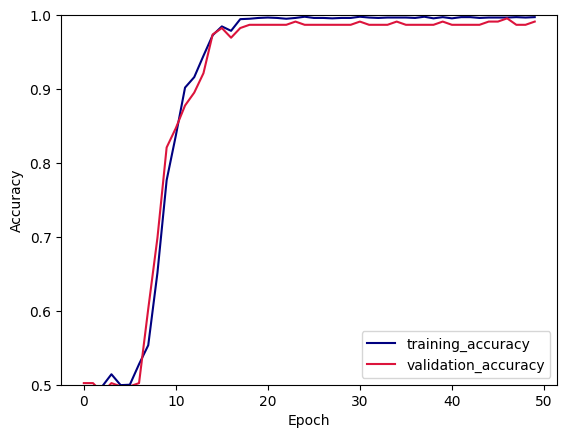

In [5]:
model.summary()
plt.plot(history.history['accuracy'], label='training_accuracy', color="navy")
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy', color="crimson")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


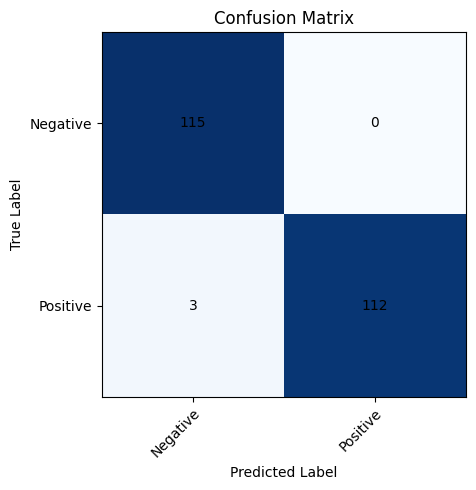

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict class probabilities
y_pred_probs = model.predict(test_data)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# True labels should already be 0 or 1
y_true = test_labels.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Class names for binary classification
class_names = ['Negative', 'Positive']  # Or replace with your actual class names

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap='Blues')

# Set ticks and labels
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate each cell
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.tight_layout()
plt.show()
